## Linear Regression:
We will use Linear regression to demonstrate Moore's law:<br>
<b>Fig moore's law</b>

Here the problem is exponential as every year the number of transisters double.<br>
so we will use log of number of transistors to make it linear.<br>
number of transisters is in 2nd column and year is in 3rd.<br>
<b>Goal here is:<br>(i)to show linear relationship in log of number of transisters and year.<br>(ii)to show number of transistors double every two years</b>

`Data is Data`<br>
we have to minimize the `squared error`<br>
taking partial derivative of squared error wrt a and b respectively, we solve for a and b.<br>

<b>Fig values of a and b</b>

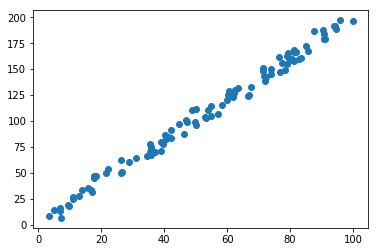

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
X=[]
Y=[]
for line in open('data_1d.csv'):
    x,y = line.split(',')
    X.append(float(x))
    Y.append(float(y))
X = np.array(X)
Y = np.array(Y)
plt.scatter(X,Y)

[191.69107156  73.40033825  59.70888793 200.04374055 134.6541465
 117.70140772 109.03253413 163.23006493 161.95302519 157.22687651
  36.12953718 181.97592734 108.02977779 144.14051872  39.18138143
 115.54860556 162.91168877 164.64871484  75.70294737  90.81753142
  55.45890889 148.96605693  37.85970159  16.31713371  54.77836881
 166.20483683  80.67714285 154.21924834  86.13993556 188.99729889
  85.99382217   9.19897215  16.44718721  30.23594106 127.72565267
 122.19270381 159.89872354 167.46778996 111.14518947 125.25700848
 134.346438   123.82463362  96.20755007 162.94384962 182.41456945
  36.09004217 153.78195174 144.62758755  22.29088522  73.46364625
  73.65889458 182.03569977  17.18967731  72.61458615 158.85712223
  45.38103823 159.64059254  99.06470845 110.95146298 175.47494321
  79.69595275  21.39832425  24.80221251  93.87198766 171.91250045
 101.71260448  24.7084738   46.71190545 136.12217728  28.0885821
  95.50912276  12.42871435  82.82885829  54.80421236  79.56890841
 187.9709304

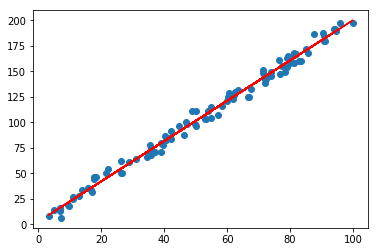

In [3]:
# Lets apply linear regression to a and b for above data:
denominator = X.dot(X)-(np.sum(X)*np.mean(X))
a = (X.dot(Y) - (X.sum()*Y.mean()))/denominator
b = ((Y.mean()*X.dot(X))-X.mean()*X.dot(Y))/denominator
# Predicted Y
Y_pred = a*X + b
print(Y_pred)
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')


### Determining the effectiveness of our model: R squared = 1-(sum of square residuals/sum of square total) ;
`sum of square residuals is just the sum of prediction errors(i.e sum of difference of y and predicted y)`<br>
`sum of square total is sum of (difference between y and mean of y)`<br>
if prediction error is less (near to 0) then R squared will be near to 1(near to perfect model). <br>
when SSres and SStot are almost equal, R squared is near to 0(not a good model). <br>
when SSres > SStot then R squared is less than 1 which means(model is bad).<br>


In [4]:
# Calculating R squared error
SSres = (Y - Y_pred).dot(Y - Y_pred)
SStot = (Y - Y.mean()).dot(Y - Y.mean())
R_sq = 1-(SSres/SStot)
print("R squared error is: " + str(R_sq))

R squared error is: 0.9911838202977805


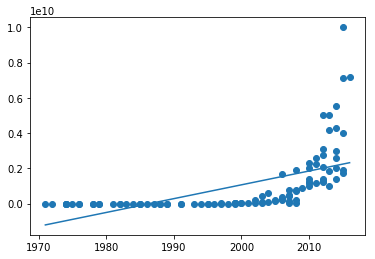

In [7]:
# Moore's law
import re 
import numpy as np

X=[]
Y=[]

clean = re.compile('[^\d]+')
for line in open('moore.csv'):
    r = line.split('\t')
    x = int(clean.sub('',r[2].split('[')[0]))
    y = int(clean.sub('',r[1].split('[')[0]))
    X.append(x)
    Y.append(y)

X=np.array(X)
Y=np.array(Y)

denominator = X.dot(X) - X.sum()*X.mean()
a = (X.dot(Y)-(X.mean()*Y.sum()))/denominator
b = (Y.mean()*X.dot(X)-(X.mean()*X.dot(Y)))/denominator

Y_pred = a*X + b
plt.scatter(X,Y)
plt.plot(X,Y_pred)



`Since we see here the model is linear and data distribution is exponential, we use log for the number of transistors`

In [8]:
# calculating the r squared for above model
SSres = (Y-Y_pred).dot(Y-Y_pred)
SStot = (Y-Y.mean()).dot(Y-Y.mean())
R_sq = 1-(SSres/SStot)
print("R-square for model without log conversion: "+str(R_sq))

R-square for model without log conversion: 0.33375819946741414


#### Above R-square is very low (0.3) so now lets try taking log of the number of transistors


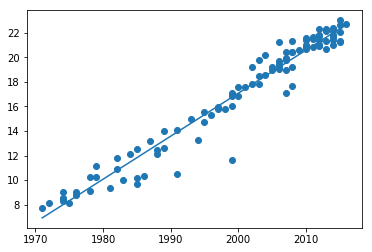

In [9]:
Y = np.log(Y)
denominator = X.dot(X) - X.sum()*X.mean()
a = (X.dot(Y)-(X.mean()*Y.sum()))/denominator
b = (Y.mean()*X.dot(X)-(X.mean()*X.dot(Y)))/denominator

Y_pred = a*X + b
plt.scatter(X,Y)
plt.plot(X,Y_pred)

In [10]:
# calculating the r squared for above model
SSres = (Y-Y_pred).dot(Y-Y_pred)
SStot = (Y-Y.mean()).dot(Y-Y.mean())
R_sq = 1-(SSres/SStot)
print("R-square for model without log conversion: "+str(R_sq))

R-square for model without log conversion: 0.9529442852285762


`0.95` is a pretty good R squared<br>
<b>According to above model, log(num_of_transistors)=a*X+b ; Y=a*X+b<br>
This means:<br>
 To determine the time for number of to double:<br>
 ln(Y) = a*X+b<br>
for number of transisters to double: Y2/Y1 = 2<br>
 Y = e^(a*X+b)<br>
 Y2/Y1 = 2 = e^(a(X2-X1))<br>
 ln(2) = a(X2-X1)<br>
 X2 = X1+ln(2)/a <br>
 i.e Year2 = Year1 + ln(2)/a<br>
  Hence, time to double will be given by (ln(2)/a)
</b>

In [11]:
print("Time to double: ",np.log(2)/a)

Time to double:  1.9745331723800172


#### This way we demonstrated the doubling of number of transistors happens every approx 2 years.

## Multiple Linear regression:
`Where multiple inputs that affect our output.`<br>
Now there will be feature vector `X` and size of `X` will be `dimentionality` denoted by `D` and now `Y=W.T*X + b(for single prediction); or Xn*d*Wd*n(for N sample prediction)` where W is the weight vector and has dimentionality `D`.
<b>fig data matrix X</b>


<b>figs example of prediction</b>



### cost function minimization gives us the value equation for the weight:
`W=(((X.T).dot(X)).inv).dot(X.T).dot(Y)` 
<br>i.e. <br>
`W=np.linalg.solve((X.T).dot(X),(X.T).dot(Y))`
<br>
Hence,<br>
`Y_pred = X.dot(W)`<br>
<b>AI Notebook has the scribbles</b>

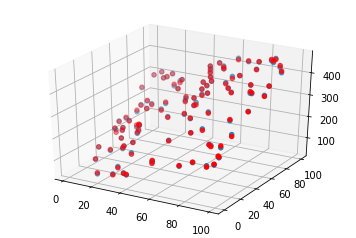

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
X=[]
Y=[]

for line in open('data_2d.csv'):
    data = line.split(',')
    X.append([float(data[0]),float(data[1]),1])
    Y.append(float(data[2]))
    
X = np.array(X)
Y = np.array(Y)

W = np.linalg.solve((X.T).dot(X),(X.T).dot(Y))
Y_pred = X.dot(W)

# ploting 
fig = plt.figure()
ax = fig.add_subplot(111,projection='3d')
ax.scatter(X[:,0],X[:,1],Y)
ax.scatter(X[:,0],X[:,1],Y_pred,color='red')

In [22]:
# R square for above model
SSres = (Y - Y_pred).dot(Y - Y_pred)
SStot = (Y - Y.mean()).dot(Y - Y.mean())
R_sq = 1 - SSres/SStot
print("R square value for multiple reg. above is: "+ str(R_sq))


R square value for multiple reg. above is: 0.9980040612475777


### 0.99 is pretty good R square value.

## Polynomial linear regression

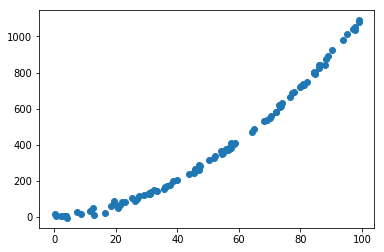

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
X=[]
Y=[]

for line in open('data_poly.csv'):
    x,y = line.split(',')
    x = float(x)
    y = float(y)
    X.append([1,x,x*x])
    Y.append(y)
    
X = np.array(X)
Y = np.array(Y)

plt.scatter(X[:,1],Y)

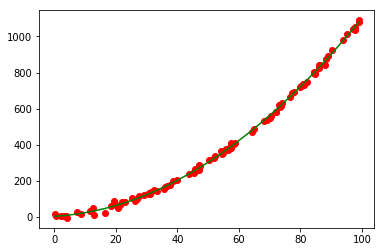

In [40]:

# calculating the weights
W = np.linalg.solve((X.T).dot(X),(X.T).dot(Y))
Y_pred = X.dot(W)

# plot 
plt.scatter(X[:,1],Y,color = 'red')
plt.plot(sorted(X[:,1]),sorted(Y_pred),color='green')

In [36]:
# R square value for above model
SSres = (Y - Y_pred).dot(Y - Y_pred)
SStot = (Y - Y.mean()).dot(Y - Y.mean())
R_sq = 1 - SSres/SStot
print("The R sqare value for polynomial regresion is: "+str(R_sq))

The R sqare value for polynomial regresion is: 0.9991412296366858


## Using multiple regression on mlro2.xls to analyse the effects of age and weight on systolic blood pressure

In [44]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

df = pd.read_excel('mlr02.xls')

df['ones'] = 1 

X = df[['X2','X3','ones']]
X_age = df[['X2','ones']]
X_weight = df[['X3','ones']]
Y = df['X1']

def find_Rsq(X_check,Y_check):
    W = np.linalg.solve(X_check.T.dot(X_check),X_check.T.dot(Y_check))
    Y_pred = X_check.dot(W)
    SSres = (Y_check - Y_pred).dot(Y_check - Y_pred)
    SStot = (Y_check - Y.mean()).dot(Y_check - Y.mean())
    R_sq = 1 - SSres/SStot
    return R_sq

print("The R square for multiple regression using weight only: "+str(find_Rsq(X_weight,Y)))
print("The R square for multiple regression using age only: "+str(find_Rsq(X_age,Y)))
print("The R square for multiple regression using both age and weight: "+str(find_Rsq(X,Y)))

*** No CODEPAGE record, no encoding_override: will use 'ascii'
The R square for multiple regression using weight only: 0.9419952085293065
The R square for multiple regression using age only: 0.9578407208147356
The R square for multiple regression using both age and weight: 0.9768471041502091


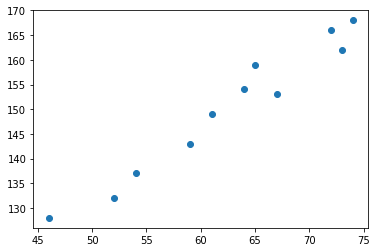

In [45]:
plt.scatter(X_age['X2'],Y)

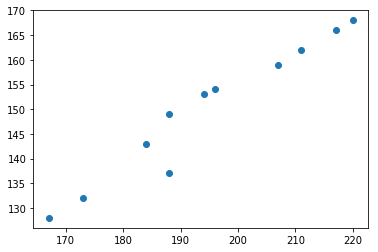

In [46]:
plt.scatter(X_weight['X3'],Y)